In [2]:
# importation des librairy 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('food_orders_new_delhie.csv')

In [4]:
df.head()

,Unnamed: 0,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount
0,0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70
1,1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60
2,2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55
3,3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,NaN,NaN
4,4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Order ID                1000 non-null   int64 
 1   Customer ID             1000 non-null   object
 2   Restaurant ID           1000 non-null   object
 3   Order Date and Time     1000 non-null   object
 4   Delivery Date and Time  1000 non-null   object
 5   Order Value             1000 non-null   int64 
 6   Delivery Fee            1000 non-null   int64 
 7   Payment Method          1000 non-null   object
 8   Discounts and Offers    815 non-null    object
 9   Commission Fee          1000 non-null   int64 
 10  Payment Processing Fee  1000 non-null   int64 
 11  Refunds/Chargebacks     1000 non-null   int64 
dtypes: int64(6), object(6)
memory usage: 93.9+ KB


In [35]:
def extract_discount(discount_str):
    if isinstance(discount_str, str):
        if 'off' in discount_str:
            try:
                # Extract numerical value before 'off'
                return float(discount_str.split(' ')[0])
            except ValueError:
                return 0.0
        elif '%' in discount_str:
            try:
                # Extract numerical value before '%'
                return float(discount_str.split('%')[0])
            except ValueError:
                return 0.0
        else:
            # No recognized discount
            return 0.0
    elif isinstance(discount_str, (int, float)):
        # If it's already a number, return it as is
        return discount_str
    else:
        # If it's an unrecognized type, return 0.0
        return 0.0

In [36]:
# apply the function to create a new 'Discount Value' column
df['Discount Percentage'] = df['Discounts and Offers'].apply(lambda x: extract_discount(x))

In [ ]:
# for percentage discounts, calculate the discount amount based on the order value
df['Discount Amount'] = df(lambda x: (x['Order Value'] * x['Discount Percentage'] / 100)
                                                   if x['Discount Percentage'] > 1
                                                   else x['Discount Percentage'], axis=1)


In [38]:

# adjust 'Discount Amount' for fixed discounts directly specified in the 'Discounts and Offers' column
df['Discount Amount'] = df.apply(lambda x: x['Discount Amount'] if x['Discount Percentage'] <= 1
                                                   else x['Order Value'] * x['Discount Percentage'] / 100, axis=1)

In [5]:
df['Total Costs'] = df['Delivery Fee'] + df['Payment Processing Fee'] + df['Discount Amount']
df['Revenue'] = df['Commission Fee']
df['Profit'] = df['Revenue'] - df['Total Costs']


In [6]:
total_revenue = df['Revenue'].sum()
total_costs = df['Total Costs'].sum()
total_profit = df['Profit'].sum()

In [7]:
df

,Unnamed: 0,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
2,2,3,C6390,R2870,2024-01-31 05:54:35,2024-01-31 06:52:35,937,30,Cash on Delivery,15% New User,195,45,0,15.0,140.55,215.55,195,-20.55
3,3,4,C6191,R2642,2024-01-16 22:52:49,2024-01-16 23:38:49,1463,50,Cash on Delivery,NaN,146,27,0,NaN,NaN,NaN,146,NaN
4,4,5,C6734,R2799,2024-01-29 01:19:30,2024-01-29 02:48:30,1992,30,Cash on Delivery,50 off Promo,130,50,0,50.0,996.00,1076.00,130,-946.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,996,C6232,R2129,2024-01-14 05:57:00,2024-01-14 06:39:00,825,0,Digital Wallet,5% on App,165,47,50,5.0,41.25,88.25,165,76.75
996,996,997,C6797,R2742,2024-01-28 08:50:43,2024-01-28 10:10:43,1627,50,Cash on Delivery,NaN,110,42,0,NaN,NaN,NaN,110,NaN
997,997,998,C5926,R2837,2024-01-21 09:43:19,2024-01-21 10:44:19,553,20,Cash on Delivery,NaN,64,31,0,NaN,NaN,NaN,64,NaN
998,998,999,C7016,R2144,2024-01-30 22:23:38,2024-01-31 00:07:38,1414,0,Cash on Delivery,15% New User,199,34,0,15.0,212.10,246.10,199,-47.10


In [8]:
# filter the dataset for profitable orders
profitable_orders = df[df['Profit'] > 0]


In [9]:
profitable_orders

,Unnamed: 0,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit
0,0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30
1,1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40
5,5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10
6,6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85
7,7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0,10.0,26.00,45.00,55,10.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,967,968,C3713,R2736,2024-01-30 06:03:39,2024-01-30 06:36:39,105,0,Digital Wallet,15% New User,143,18,0,15.0,15.75,33.75,143,109.25
977,977,978,C7704,R2525,2024-01-21 14:02:19,2024-01-21 15:19:19,1335,20,Credit Card,5% on App,132,17,50,5.0,66.75,103.75,132,28.25
988,988,989,C8311,R2380,2024-01-31 06:48:21,2024-01-31 08:43:21,1511,0,Credit Card,5% on App,136,10,0,5.0,75.55,85.55,136,50.45
989,989,990,C8186,R2622,2024-01-09 17:54:38,2024-01-09 18:42:38,1058,50,Credit Card,5% on App,182,45,0,5.0,52.90,147.90,182,34.10


In [10]:
# calculate the average commission percentage for profitable orders
profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100

C:\Users\BILLO\AppData\Local\Temp\ipykernel_18128\294950648.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  profitable_orders['Commission Percentage'] = (profitable_orders['Commission Fee'] / profitable_orders['Order Value']) * 100


In [11]:
profitable_orders

,Unnamed: 0,Order ID,Customer ID,Restaurant ID,Order Date and Time,Delivery Date and Time,Order Value,Delivery Fee,Payment Method,Discounts and Offers,Commission Fee,Payment Processing Fee,Refunds/Chargebacks,Discount Percentage,Discount Amount,Total Costs,Revenue,Profit,Commission Percentage
0,0,1,C8270,R2924,2024-02-01 01:11:52,2024-02-01 02:39:52,1914,0,Credit Card,5% on App,150,47,0,5.0,95.70,142.70,150,7.30,7.836991
1,1,2,C1860,R2054,2024-02-02 22:11:04,2024-02-02 22:46:04,986,40,Digital Wallet,10%,198,23,0,10.0,98.60,161.60,198,36.40,20.081136
5,5,6,C7265,R2777,2024-01-25 04:36:52,2024-01-25 05:27:52,439,20,Cash on Delivery,10%,92,27,150,10.0,43.90,90.90,92,1.10,20.956720
6,6,7,C1466,R2457,2024-01-12 23:55:48,2024-01-13 00:48:48,303,30,Digital Wallet,5% on App,144,12,50,5.0,15.15,57.15,144,86.85,47.524752
7,7,8,C5426,R2978,2024-01-26 22:46:24,2024-01-27 00:36:24,260,0,Credit Card,10%,55,19,0,10.0,26.00,45.00,55,10.00,21.153846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,967,968,C3713,R2736,2024-01-30 06:03:39,2024-01-30 06:36:39,105,0,Digital Wallet,15% New User,143,18,0,15.0,15.75,33.75,143,109.25,136.190476
977,977,978,C7704,R2525,2024-01-21 14:02:19,2024-01-21 15:19:19,1335,20,Credit Card,5% on App,132,17,50,5.0,66.75,103.75,132,28.25,9.887640
988,988,989,C8311,R2380,2024-01-31 06:48:21,2024-01-31 08:43:21,1511,0,Credit Card,5% on App,136,10,0,5.0,75.55,85.55,136,50.45,9.000662
989,989,990,C8186,R2622,2024-01-09 17:54:38,2024-01-09 18:42:38,1058,50,Credit Card,5% on App,182,45,0,5.0,52.90,147.90,182,34.10,17.202268


In [42]:
df.to_csv('food_orders_new_delhie.csv')

In [9]:
data = pd.read_csv("bank-direct-marketing-campaigns.csv")

In [10]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [11]:
data.shape

(41188, 20)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  campaign        41188 non-null  int64  
 11  pdays           41188 non-null  int64  
 12  previous        41188 non-null  int64  
 13  poutcome        41188 non-null  object 
 14  emp.var.rate    41188 non-null  float64
 15  cons.price.idx  41188 non-null  float64
 16  cons.conf.idx   41188 non-null  float64
 17  euribor3m       41188 non-null 

In [13]:
data.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

In [14]:
data.describe()

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [15]:
data.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'campaign', 'pdays', 'previous',
       'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'y'],
      dtype='object')

C:\Users\BILLO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.8_qbz5n2kfra8p0\LocalCache\local-packages\Python38\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


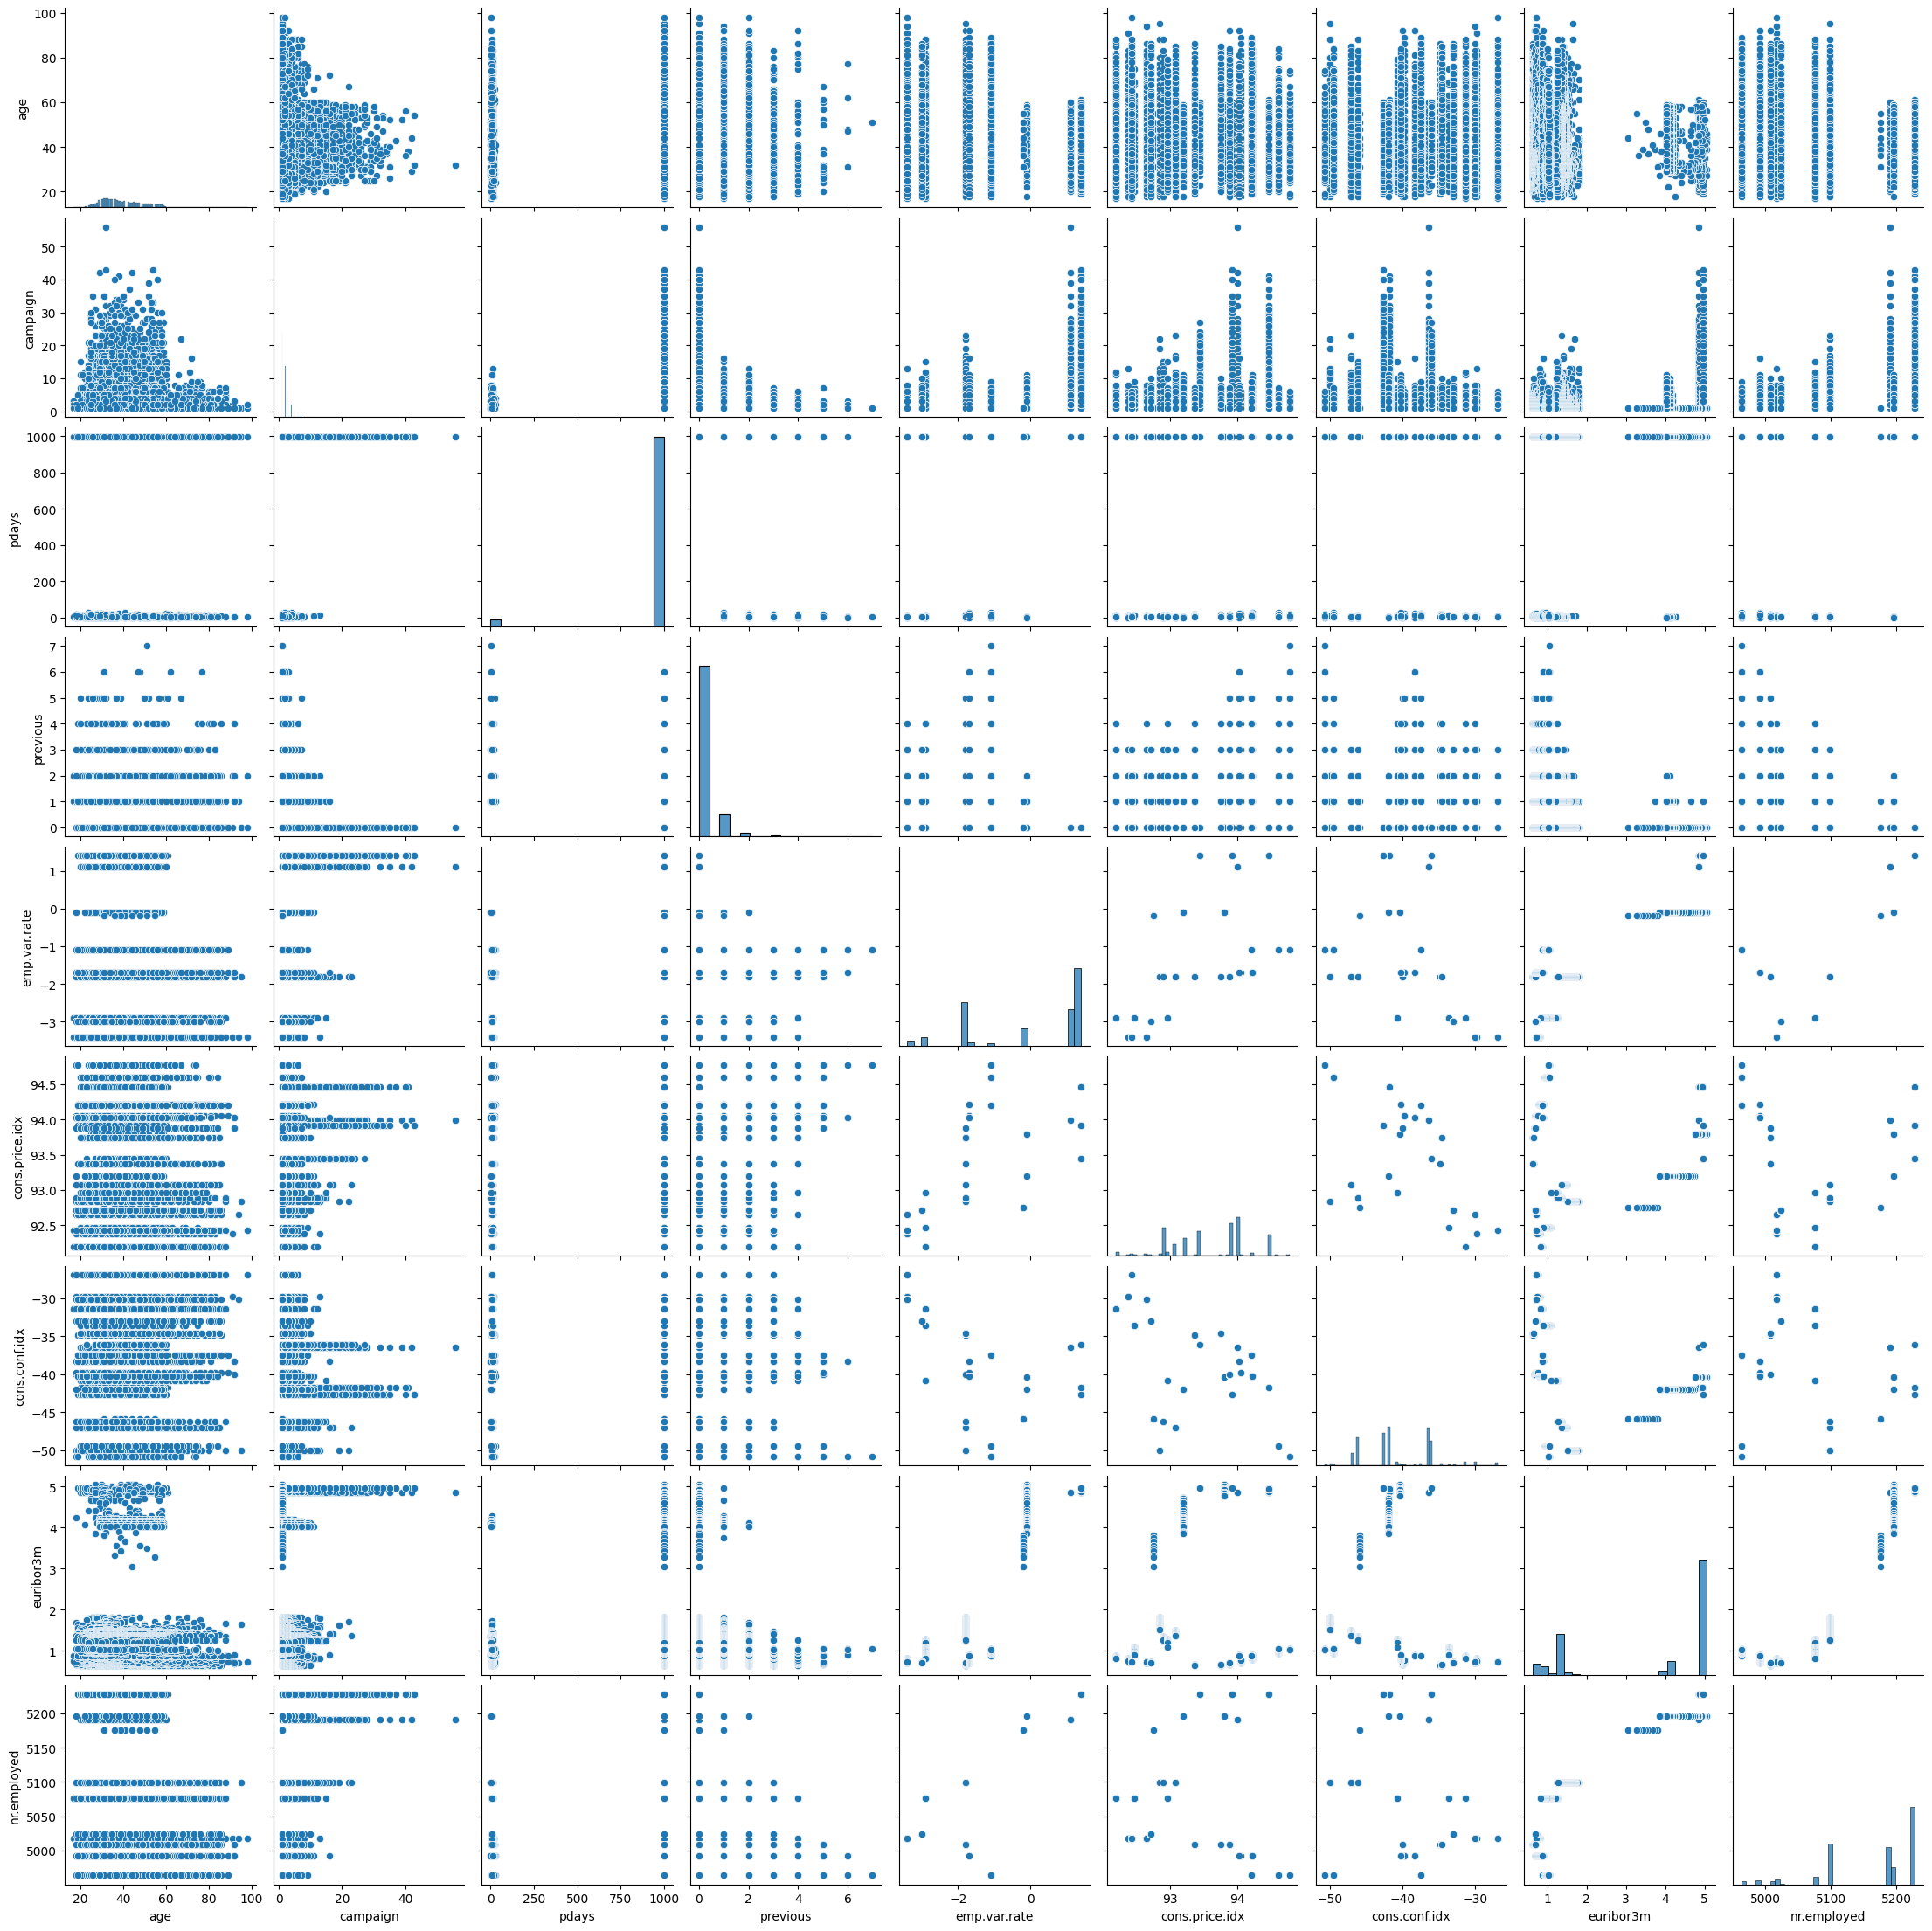

In [16]:
sns.pairplot(data)

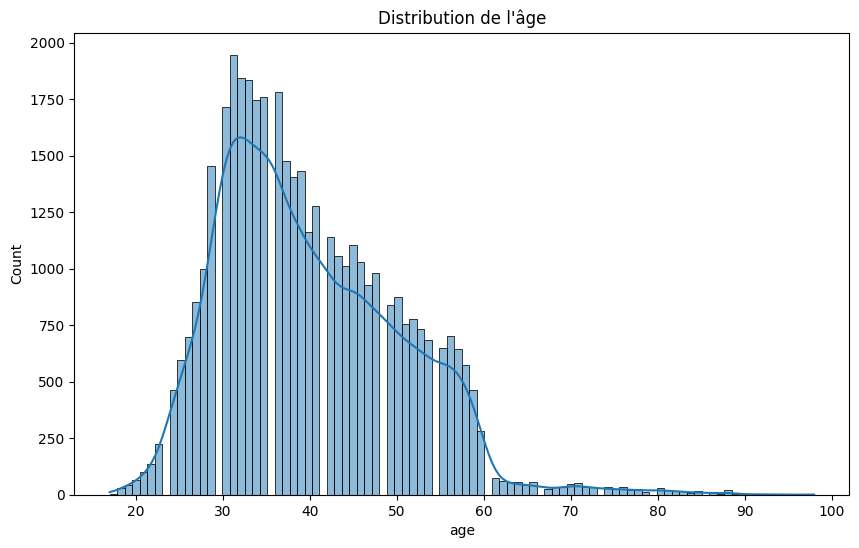

In [17]:
# Distribution de l'âge
plt.figure(figsize=(10, 6))
sns.histplot(data['age'], kde=True)
plt.title('Distribution de l\'âge')
plt.show()

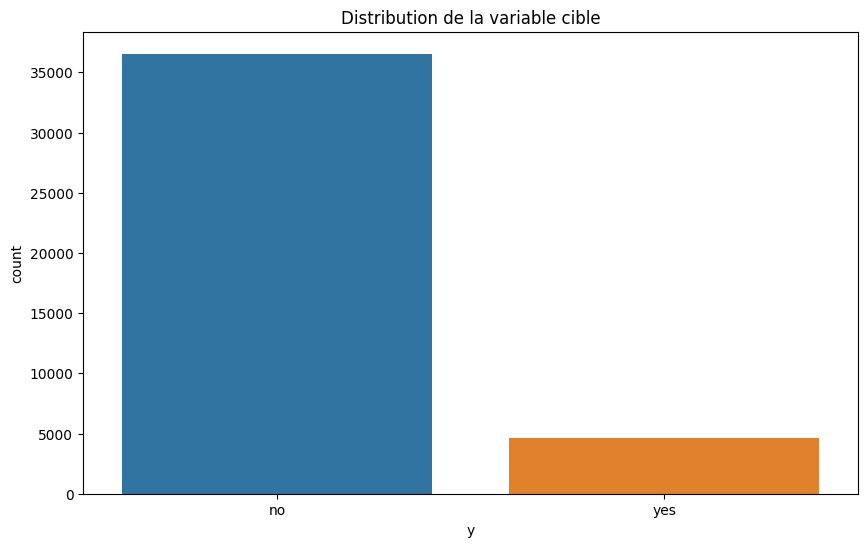

In [20]:
# Distribution de la variable cible
plt.figure(figsize=(10, 6))
sns.countplot(x='y', data=data)
plt.title('Distribution de la variable cible')
plt.show()

In [25]:
# Encodage des variables catégorielles
data = pd.get_dummies(data, drop_first=True)

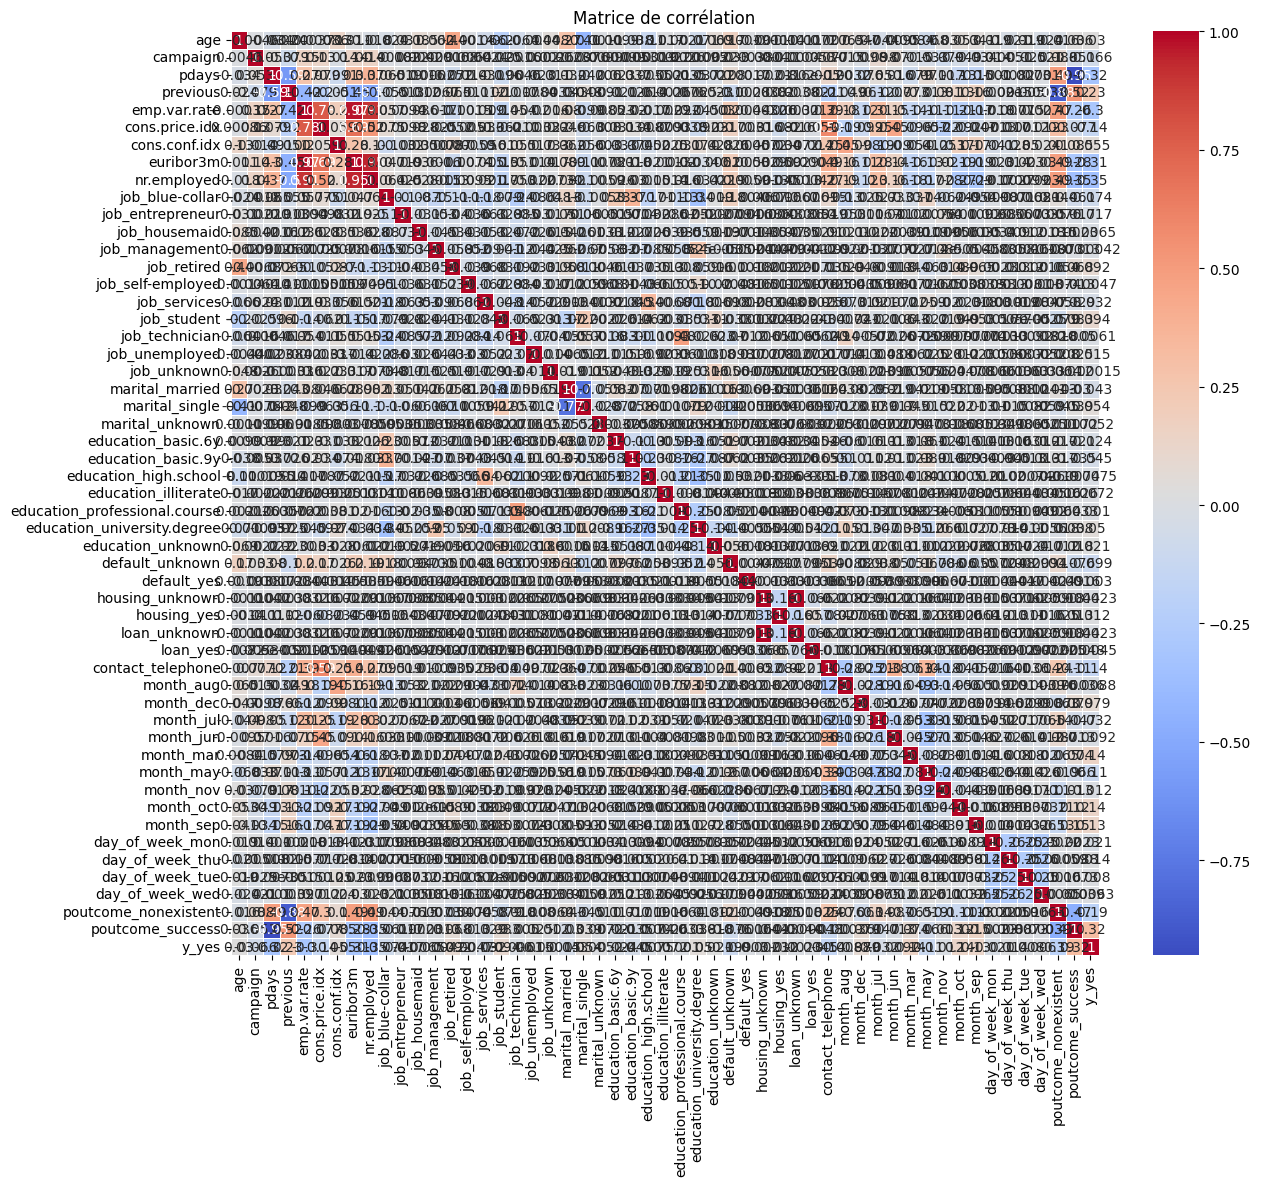

In [26]:
# Matrice de corrélation
plt.figure(figsize=(14, 12))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matrice de corrélation')
plt.show()

In [28]:
data.columns

Index(['age', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'job_unknown',
       'marital_married', 'marital_single', 'marital_unknown',
       'education_basic.6y', 'education_basic.9y', 'education_high.school',
       'education_illiterate', 'education_professional.course',
       'education_university.degree', 'education_unknown', 'default_unknown',
       'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown',
       'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue',
       'day_of_week_wed', 'poutcome_nonexistent', 'poutcome_success', 'y_

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Séparer les caractéristiques et la variable cible
X = data.drop('y_yes', axis=1)
y = data['y_yes']

# Diviser les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normaliser les variables numériques
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [32]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# Modèle de régression logistique
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log_reg = log_reg.predict(X_test)

# Évaluation du modèle de régression logistique
print('Logistic Regression:')
print('Accuracy:', accuracy_score(y_test, y_pred_log_reg))
print('Precision:', precision_score(y_test, y_pred_log_reg))
print('Recall:', recall_score(y_test, y_pred_log_reg))
print('F1 Score:', f1_score(y_test, y_pred_log_reg))
print('AUC-ROC:', roc_auc_score(y_test, y_pred_log_reg))

# Modèle de Random Forest
rf_clf = RandomForestClassifier()
rf_clf.fit(X_train, y_train)
y_pred_rf = rf_clf.predict(X_test)

# Évaluation du modèle de Random Forest
print('Random Forest:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Precision:', precision_score(y_test, y_pred_rf))
print('Recall:', recall_score(y_test, y_pred_rf))
print('F1 Score:', f1_score(y_test, y_pred_rf))
print('AUC-ROC:', roc_auc_score(y_test, y_pred_rf))


Logistic Regression:
Accuracy: 0.9007040543821316
Precision: 0.6723404255319149
Recall: 0.22750179985601152
F1 Score: 0.3399677245831092
AUC-ROC: 0.6067304768791363
Random Forest:
Accuracy: 0.8922877721129724
Precision: 0.5392953929539296
Recall: 0.2865370770338373
F1 Score: 0.3742360131640809
AUC-ROC: 0.62776890321422


In [34]:
# Encodage des variables catégorielles
data = pd.get_dummies(data, drop_first=True)

In [35]:
data

,age,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,...,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success,y_yes
0,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,True,False,False
1,57,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,True,False,False
2,37,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,True,False,False
3,40,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,True,False,False
4,56,1,999,0,1.1,93.994,-36.4,4.857,5191.0,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41183,73,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,False,...,True,False,False,False,False,False,False,True,False,True
41184,46,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,True,...,True,False,False,False,False,False,False,True,False,False
41185,56,2,999,0,-1.1,94.767,-50.8,1.028,4963.6,False,...,True,False,False,False,False,False,False,True,False,False
41186,44,1,999,0,-1.1,94.767,-50.8,1.028,4963.6,False,...,True,False,False,False,False,False,False,True,False,True
